In [45]:
#pip install xgboost

In [46]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [47]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [48]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [49]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [50]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [51]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [52]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [53]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [54]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [55]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [56]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [57]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [58]:
blind = training_data[training_data['WELL'] == '25/10-10  Balder Triassic']
training_data = training_data[training_data['WELL'] != '25/10-10  Balder Triassic']

In [59]:
blind['Facies'].unique()

array([6, 5, 7, 4])

In [60]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [61]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,7.120582,2.068850,0.441895,2.445272,0.444403,2727.514574
std,352.014203,229.875939,42.531395,3.544087,7.905972,0.455715,0.151514,0.456893,806.463487
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,947.532465,428.624351,57.623103,5.000000,0.206353,0.152812,2.360203,0.154191,2068.077698
50%,1122.756091,580.014596,80.286850,6.000000,0.282810,0.397062,2.474200,0.406591,2637.434326
75%,1250.394469,678.348782,105.959152,10.000000,0.354700,0.678576,2.558000,0.691040,3224.223145
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [63]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

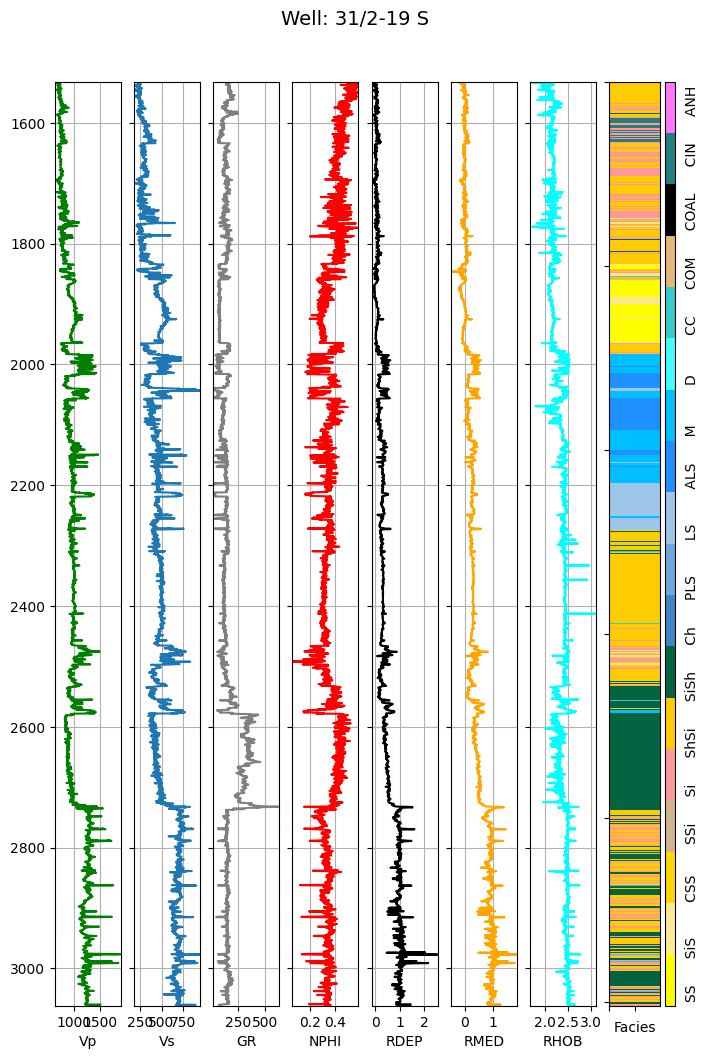

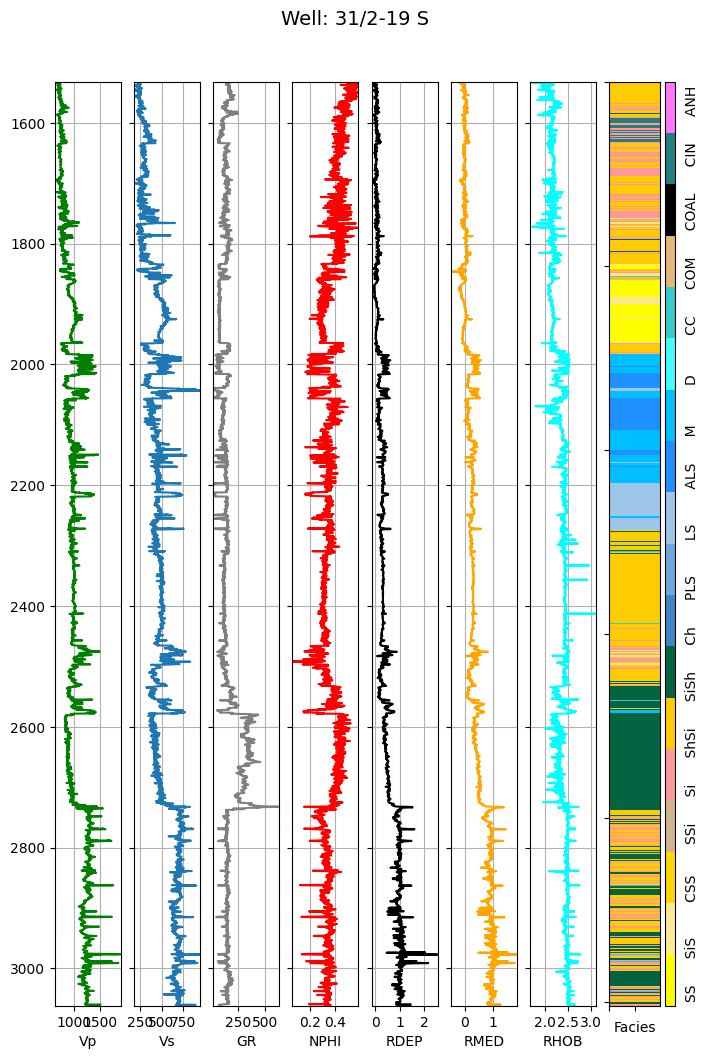

In [64]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      5783
Si      31375
ShSi    36398
SiSh    25752
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

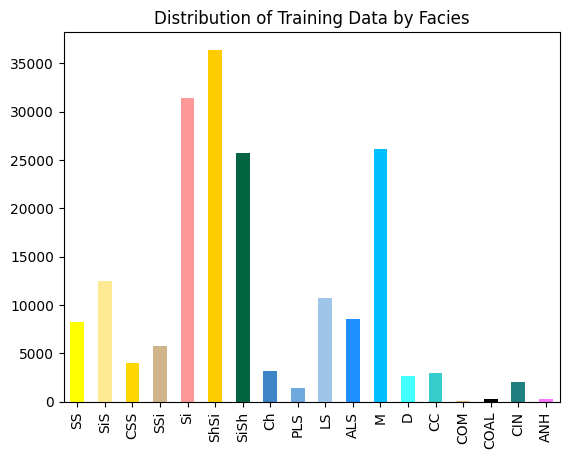

In [65]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [66]:
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels

In [67]:
# correct_labels[0:3]

In [68]:
# df = pd.DataFrame(correct_labels, columns = ['Vp','Vs'])
# df = pd.DataFrame(correct_labels, columns = ['Vp'])

# print(df)

In [69]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
correct_labels = training_data['Vp'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','FaciesLabels','Facies'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,84.603521,2.068850,0.441895,2.445272,0.444403
std,42.531395,7.905972,0.455715,0.151514,0.456893
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,57.623103,0.206353,0.152812,2.360203,0.154191
50%,80.286850,0.282810,0.397062,2.474200,0.406591
75%,105.959152,0.354700,0.678576,2.558000,0.691040
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [70]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [71]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.289356,-0.212150,-1.296204,0.230527,-1.359457
1,0.573060,-0.212214,-1.281139,0.375728,-1.354113
2,0.978768,-0.210101,-1.271298,0.183666,-1.307847
3,1.524196,-0.210114,-1.273259,0.237788,-1.271291
4,1.864792,-0.207799,-1.303617,0.169147,-1.343036
...,...,...,...,...,...
182253,-1.269007,-0.240623,-1.147226,-0.732837,-1.198160
182254,-1.221695,-0.239385,-1.115348,-0.523544,-1.161360
182255,-1.123219,-0.238524,-1.068150,-0.436094,-1.109064
182256,-1.007339,-0.239456,-1.049407,-0.560478,-1.084689


In [72]:
scaled_features

array([[ 0.28935601, -0.21215029, -1.2962045 ,  0.23052712, -1.35945719],
       [ 0.57306014, -0.21221353, -1.28113852,  0.37572753, -1.35411271],
       [ 0.9787685 , -0.2101012 , -1.27129819,  0.18366595, -1.30784656],
       ...,
       [-1.12321901, -0.23852421, -1.06815004, -0.43609434, -1.10906385],
       [-1.00733911, -0.23945584, -1.04940668, -0.56047787, -1.08468923],
       [-1.10981613, -0.23789291, -1.06667553, -0.74077695, -1.09524098]])

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [74]:
x_train

array([[ 0.83134999, -0.20803725, -0.71226943,  0.53545049, -0.62757727],
       [ 0.10043147,  3.9225958 ,  0.27797613,  0.99803229,  0.54896747],
       [-0.40476278, -0.2329827 , -0.1478677 , -0.0611955 , -0.14913032],
       ...,
       [-0.83169198, -0.22841652, -0.56302878, -0.79051306, -0.49654331],
       [-1.73430342, -0.24719058, -0.14871537,  0.88722717, -0.13634838],
       [ 0.11077686, -0.22400212, -1.15622135, -1.45843115, -1.19204931]])

In [75]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted, filename):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(filename)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('___________________')
    
def evaluate(true, predicted):
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return rmse, r2_square

## SVC Prediction

In [76]:
blind_upper = blind[blind['Depth'] < 2225] # The upper part
blind_lower = blind[blind['Depth'] > 2225] # The lower part

In [77]:
upper_count = len(blind_upper.index)
upper_count

830

In [78]:
lower_count = len(blind.index) - len(blind_upper.index)
lower_count

1631

In [79]:
def plot_well_1_upper(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[0:upper_count]
    plt.plot(blind_upper[blind_what],blind_upper['Depth'],'b-',label=label_1)
    plt.plot(load_data,blind_upper['Depth'],'-', color='orange',label=label_2)
    plt.legend()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [80]:
def plot_well_2_upper(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[0:upper_count]
    plt.plot(blind_upper[blind_what],blind_upper['Depth'],'b-',label=label_1)
    plt.plot(load_data,blind_upper['Depth'],'-', color='orange',label=label_2)
    plt.legend()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [81]:
def plot_well_1_lower(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[-1*lower_count:]
    plt.plot(blind_lower[blind_what],blind_lower['Depth'],'b-')
    plt.plot(load_data,blind_lower['Depth'],'-', color='orange')
    plt.legend()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [82]:
def plot_well_2_lower(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[-1*lower_count:]
    plt.plot(blind_lower[blind_what],blind_lower['Depth'],'b-')
    plt.plot(load_data,blind_lower['Depth'],'-', color='orange')
    plt.legend()
#     plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [83]:
def plot_well_1(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    plt.plot(blind[blind_what],blind['Depth'],label=label_1)
    plt.plot(load_data,blind['Depth'],label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)
    
    print_evaluate(blind[blind_what], load_data, filename)

In [84]:
def plot_well_2(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    plt.plot(blind[blind_what],blind['Depth'],label=label_1)
    plt.plot(load_data,blind['Depth'],label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)
    
    print_evaluate(blind[blind_what], load_data, filename)

In [85]:
# filename  = 'well_15_Vp_pred_SVM.csv'
# load_data = pd.read_csv(filename, index_col = [0])
# load_data = load_data.to_numpy()
# load_data

In [86]:
# x = 9
# font_size = 14

# Velo      = 'Vp'
# Meas      = 'Measured Vp'
# Pred      = 'Predicted Vp'
# x_lbl     = 'Vp (km/s)'
# x_low     = 750
# x_up      = 1750
# x_spacing = 250

# fig, ax = plt.subplots(1, x)
# plt.subplot(1, x, 1)
# plot_well_1('well_25_Vp_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[0].set_title("SVR", fontsize=font_size)

# plt.subplot(1, x, 2)
# plot_well_2('well_25_Vp_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[1].set_title("RF", fontsize=font_size)

# plt.subplot(1, x, 3)
# plot_well_2('well_25_Vp_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[2].set_title("XGB", fontsize=font_size)

# plt.subplot(1, x, 4)
# plot_well_2('well_25_Vp_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 5)
# plot_well_2('well_25_Vp_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[4].set_title("FF#2\nTrial: 100\nEpoch:100\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 6)
# plot_well_2('well_25_Vp_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

# plt.subplot(1, x, 7)
# plot_well_2('well_25_Vp_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[6].set_title("FF#4\nTrial: 100\nEpoch:100\nScaler: Standard", fontsize=font_size)

# plt.subplot(1, x, 8)
# plot_well_2('well_25_Vp_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 9)
# plot_well_2('well_25_Vp_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)


# fig.suptitle('Well: 25/10-10 Balder Triassic', fontsize=20, y=0.99)

# fig.savefig('well25_Vp.png', format='png', dpi=600)

well_25_Vs_pred_SVM.csv
RMSE: 65.17676330891592
R2 Square 0.3256476634975458
___________________
well_25_Vs_pred_RF.csv
RMSE: 69.24120487970282
R2 Square 0.23891963009255368
___________________
well_25_Vs_pred_XGB.csv
RMSE: 63.42475920862789
R2 Square 0.3614146636072646
___________________
well_25_Vs_pred_FF1.csv
RMSE: 59.6495259341941
R2 Square 0.43517321890720106
___________________
well_25_Vs_pred_FF2_T100_E3.csv
RMSE: 82.91277397627553
R2 Square -0.09130005813521991
___________________
well_25_Vs_pred_FF3.csv
RMSE: 59.297713064895014
R2 Square 0.4418162666718338
___________________
well_25_Vs_pred_FF4_T100_E3.csv
RMSE: 94.69859747523456
R2 Square -0.4236013183204841
___________________
well_25_Vs_pred_CNN1_T100_E1.csv
RMSE: 94.33516812325995
R2 Square -0.41269543936985187
___________________
well_25_Vs_pred_CNN2_T100_E1.csv
RMSE: 89.59528787548344
R2 Square -0.27429983245492906
___________________


Text(0.5, 0.99, '(B) Well: 25/10-10 Balder Triassic')

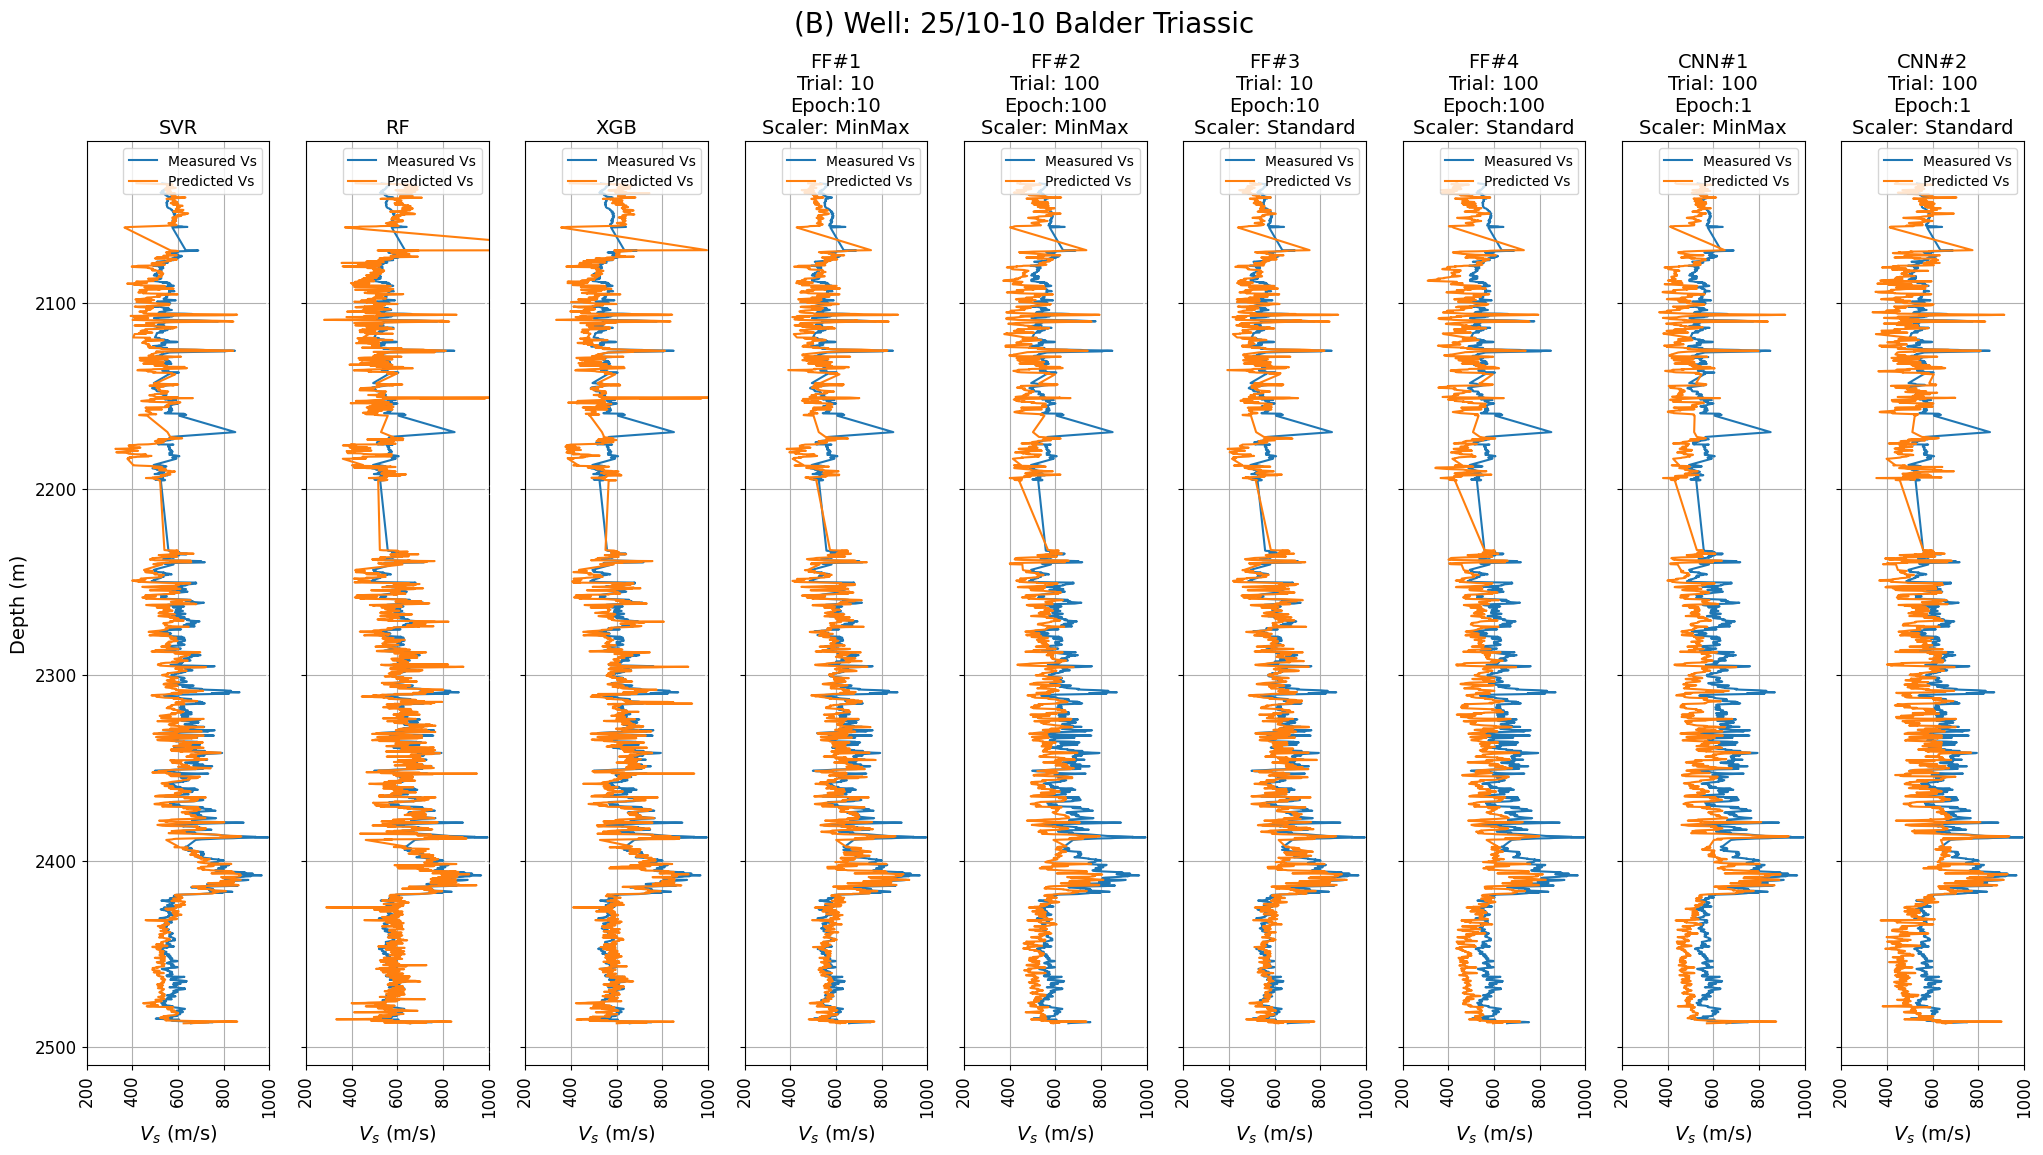

In [87]:
x = 9
font_size = 14

Velo      = 'Vs'
Meas      = 'Measured Vs'
Pred      = 'Predicted Vs'
x_lbl     = '$V_s$ (m/s)'
x_low     = 200
x_up      = 1000
x_spacing = 200

fig, ax = plt.subplots(1, x)
plt.subplot(1, x, 1)
plot_well_1('well_25_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[0].set_title("SVR", fontsize=font_size)

plt.subplot(1, x, 2)
plot_well_2('well_25_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[1].set_title("RF", fontsize=font_size)

plt.subplot(1, x, 3)
plot_well_2('well_25_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[2].set_title("XGB", fontsize=font_size)

plt.subplot(1, x, 4)
plot_well_2('well_25_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 5)
plot_well_2('well_25_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[4].set_title("FF#2\nTrial: 100\nEpoch:100\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 6)
plot_well_2('well_25_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 7)
plot_well_2('well_25_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[6].set_title("FF#4\nTrial: 100\nEpoch:100\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 8)
plot_well_2('well_25_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 9)
plot_well_2('well_25_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)

fig.suptitle('(B) Well: 25/10-10 Balder Triassic', fontsize=20, y=0.99)

# fig.savefig('well25_Vs.png', format='png', dpi=600)

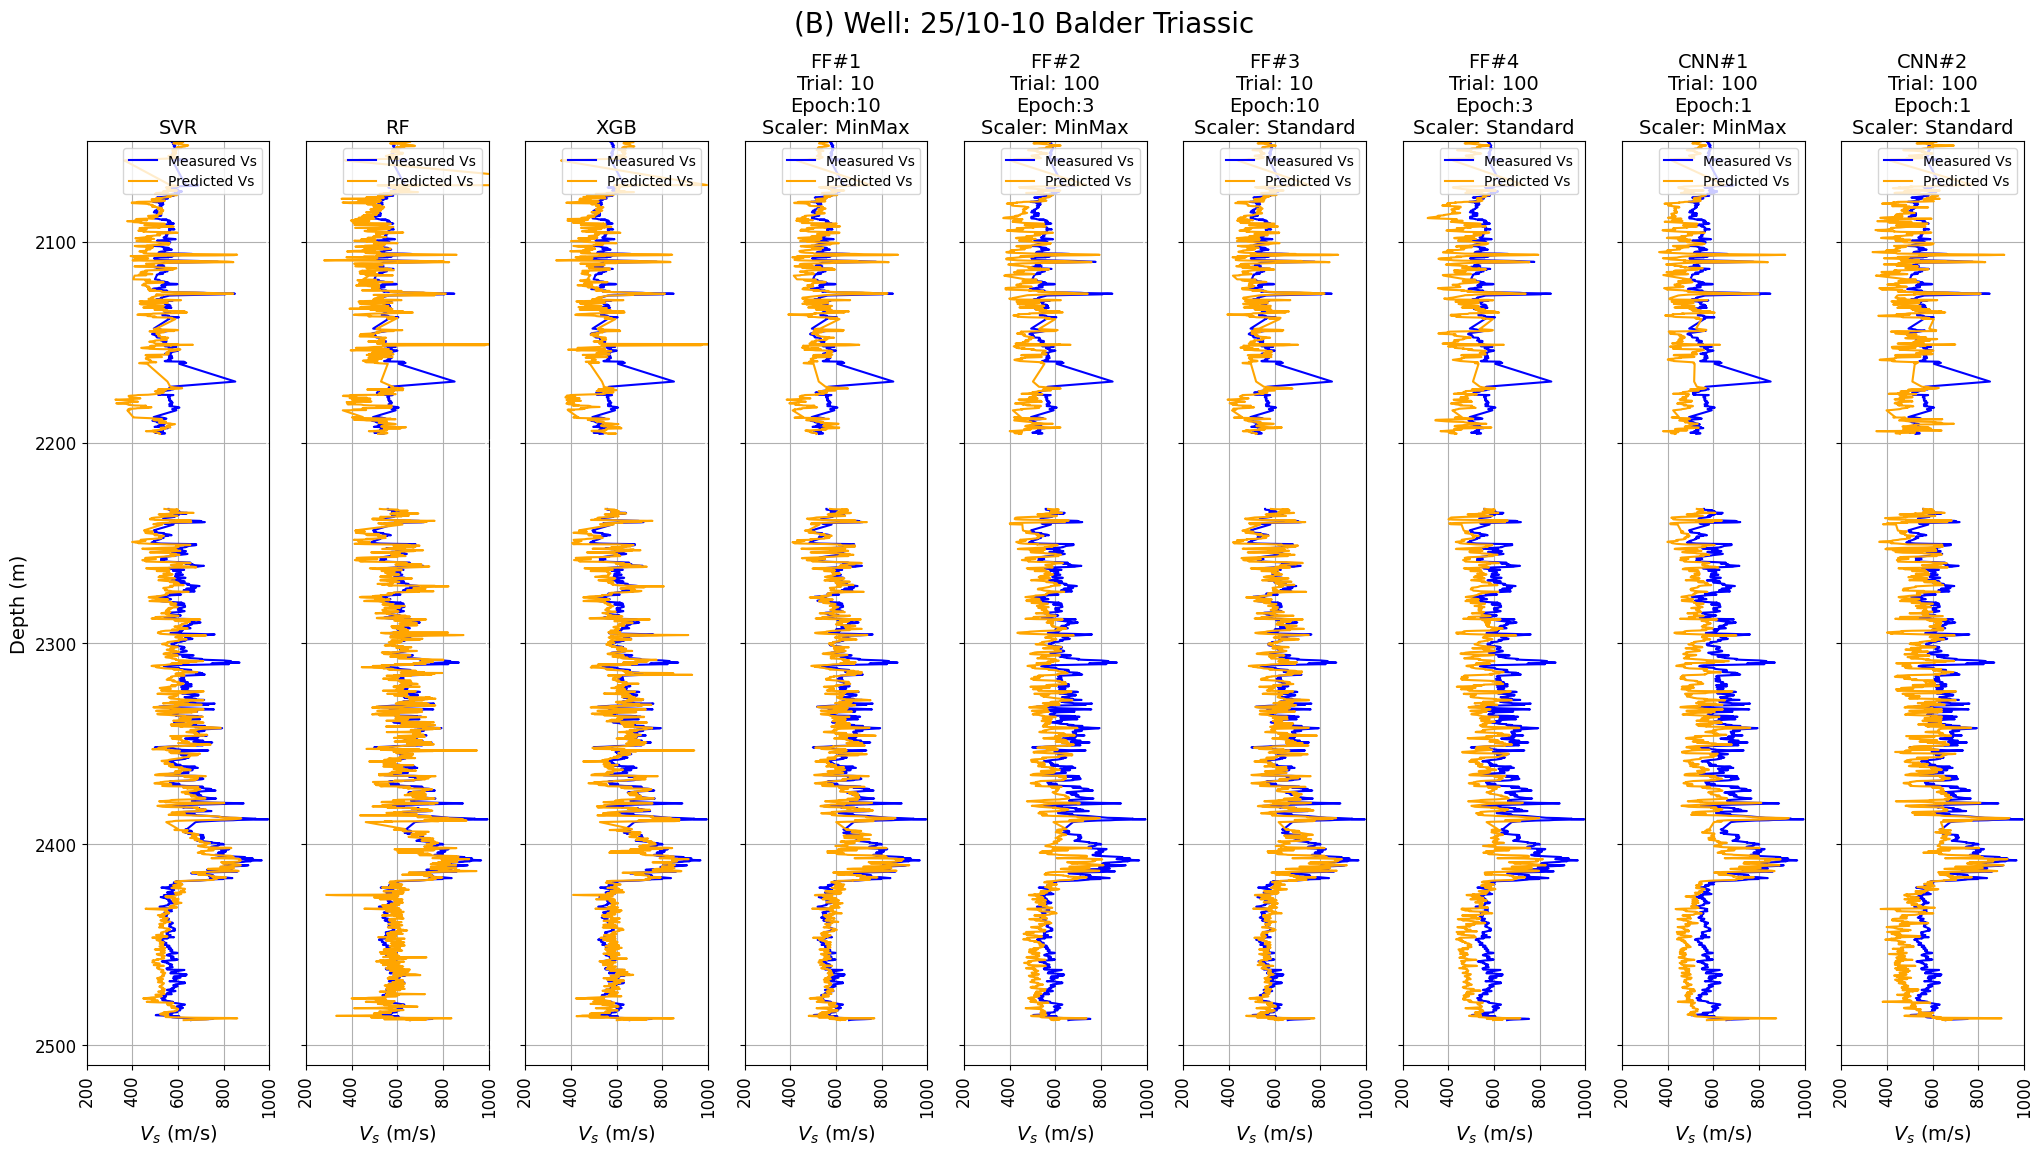

In [88]:
x = 9
font_size = 14

Velo      = 'Vs'
Meas      = 'Measured Vs'
Pred      = 'Predicted Vs'
x_lbl     = '$V_s$ (m/s)'
x_low     = 200
x_up      = 1000
x_spacing = 200

y_low     = 2050
y_up      = 2510

fig, ax = plt.subplots(1, x)
plt.subplot(1, x, 1)
plot_well_1_upper('well_25_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_1_lower('well_25_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[0].set_title("SVR", fontsize=font_size)

plt.subplot(1, x, 2)
plot_well_2_upper('well_25_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[1].set_title("RF", fontsize=font_size)

plt.subplot(1, x, 3)
plot_well_2_upper('well_25_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[2].set_title("XGB", fontsize=font_size)

plt.subplot(1, x, 4)
plot_well_2_upper('well_25_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 5)
plot_well_2_upper('well_25_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[4].set_title("FF#2\nTrial: 100\nEpoch:3\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 6)
plot_well_2_upper('well_25_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 7)
plot_well_2_upper('well_25_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[6].set_title("FF#4\nTrial: 100\nEpoch:3\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 8)
plot_well_2_upper('well_25_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 9)
plot_well_2_upper('well_25_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_25_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)

fig.suptitle('(B) Well: 25/10-10 Balder Triassic', fontsize=20, y=0.99)

fig.savefig('well25_Vs.png', format='png', dpi=300)